In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
with open('../witb_42.pkl', 'rb') as f:
    data = pickle.load(f)  # might be pickle.load()

In [2]:
path = r'/home/sasha/Documents/MilaPostDoc/Python/CommonCrawl/witb_results/'
pickles_list = [path+ f for f in os.listdir(path)]

In [3]:
alldf=pd.DataFrame(columns=['Adult_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit','Offense_Sonar', 'Profanity_Ngrams', 'Perplexity'])

'Delimit'
'hate_speech':1
    'normal':0,

'Sonar':
'neither': 0,
'offensive_language': 1,
'hate_speech': 2

In [4]:
data_all = []
for pickle_file in pickles_list:
    data= pickle.load(open(pickle_file,'rb'))
    df = pd.DataFrame(columns=['Adult_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit', 'Profanity_Ngrams', 'Perplexity'])
    df['Adult_Ngrams']= data['ngram']['pornography']
    df['Hate_Ngrams']= data['ngram']['hate-speech']
    df['Hate_Sonar']= [n[2] for n in data['sonar']]
    df['Hate_Delimit']= [n[1] for n in data['delimit']]
    df['Profanity_Ngrams']= data['ngram']['profanity']
    df['Perplexity']= data['perplexity'].astype(float)
    df['Perplexity'] = df['Perplexity'].replace(-np.inf, np.nan)
    #print(df.shape)
    data_all.append(df)

alldf = pd.concat(data_all, ignore_index=False)
print(alldf.shape)

(4108860, 6)


In [5]:
alldf.head()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
0,0,0,0.0,0.0,12,363.7
1,1,0,0.0,0.0,3,551.1
2,0,1,0.0,0.0,13,538.4
3,0,0,0.0,0.0,3,722.7
4,0,0,0.0,0.0,2,461.8


In [6]:
alldf.shape

(4108860, 6)

In [43]:
print('Adult content: ')
print('% of websites containing adult ngrams: ', round((alldf.query("0 < Adult_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing 3 + adult ngrams: ', round((alldf.query("3 <= Adult_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing 10 + adult ngrams: ', round((alldf.query("10 <= Adult_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('Hate speech: ')
print('% of websites containing hate ngrams: ', round((alldf.query("0 < Hate_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing 3 + hate ngrams: ', round((alldf.query("3 <= Hate_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing 10 + hate ngrams: ', round((alldf.query("10 <= Hate_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing 10 + hate ngrams: ', round((alldf.query("10 <= Hate_Ngrams").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Sonar): ', round((alldf.query("0 < Hate_Sonar").shape[0]/alldf.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Delimit): ', round((alldf.query("0 < Hate_Delimit").shape[0]/alldf.shape[0]*100), 2),'%')

Adult content: 
% of websites containing adult ngrams:  2.36 %
% of websites containing 3 + adult ngrams:  1.36 %
% of websites containing 10 + adult ngrams:  0.73 %
Hate speech: 
% of websites containing hate ngrams:  17.78 %
% of websites containing 3 + hate ngrams:  6.38 %
% of websites containing 10 + hate ngrams:  1.16 %
% of websites containing 10 + hate ngrams:  1.16 %
% of websites containing hate speech (Sonar):  4.02 %
% of websites containing hate speech (Delimit:  5.25 %


In [17]:
lowperplex=alldf[alldf['Perplexity'] < alldf['Perplexity'].quantile(.3)]
lowperplex.head()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
0,0,0,0.0,0.0,12,363.7
1,1,0,0.0,0.0,3,551.1
2,0,1,0.0,0.0,13,538.4
4,0,0,0.0,0.0,2,461.8
5,0,2,1.0,1.0,26,474.0


In [19]:
lowperplex.shape

(1229505, 6)

In [18]:
lowperplex['Perplexity'].describe()

count    1.229505e+06
mean     3.959584e+02
std      1.072374e+02
min      1.100000e+00
25%      3.229000e+02
50%      4.053000e+02
75%      4.830000e+02
max      5.648000e+02
Name: Perplexity, dtype: float64

In [46]:
print('Adult content: ')
print('% of websites containing adult ngrams: ', round((lowperplex.query("0 < Adult_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing 3 + adult ngrams: ', round((lowperplex.query("3 <= Adult_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing 10 + adult ngrams: ', round((lowperplex.query("10 <= Adult_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('Hate speech: ')
print('% of websites containing hate ngrams: ', round((lowperplex.query("0 < Hate_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing 3 + hate ngrams: ', round((lowperplex.query("3 <= Hate_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing 10 + hate ngrams: ', round((lowperplex.query("10 <= Hate_Ngrams").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Sonar): ', round((lowperplex.query("0 < Hate_Sonar").shape[0]/lowperplex.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Delimit): ', round((lowperplex.query("0 < Hate_Delimit").shape[0]/lowperplex.shape[0]*100), 2),'%')

Adult content: 
% of websites containing adult ngrams:  1.81 %
% of websites containing 3 + adult ngrams:  0.42 %
% of websites containing 10 + adult ngrams:  0.08 %
Hate speech: 
% of websites containing hate ngrams:  18.95 %
% of websites containing 3 + hate ngrams:  6.19 %
% of websites containing 10 + hate ngrams:  1.18 %
% of websites containing hate speech (Sonar):  3.48 %
% of websites containing hate speech (Delimit):  5.8 %


In [23]:
highperplex=alldf[alldf['Perplexity'] > alldf['Perplexity'].quantile(.7)]
highperplex.head()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
9,0,0,0.0,0.0,0,5256.5
12,0,0,0.0,0.0,0,2450.3
13,0,0,0.0,0.0,0,3726.5
15,0,0,0.0,0.0,0,1545.7
20,0,5,7.0,0.0,32,2535.2


In [28]:
highperplex.shape

(1229560, 6)

In [29]:
highperplex['Perplexity'].describe()

count    1.229560e+06
mean     2.709832e+03
std      3.255988e+03
min      1.308900e+03
25%      1.580300e+03
50%      1.999300e+03
75%      2.859125e+03
max      3.351162e+05
Name: Perplexity, dtype: float64

In [47]:
print('Adult content: ')
print('% of websites containing adult ngrams: ', round((highperplex.query("0 < Adult_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing 3 + adult ngrams: ', round((highperplex.query("3 <= Adult_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing 10 + adult ngrams: ', round((highperplex.query("10 <= Adult_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('Hate speech: ')
print('% of websites containing hate ngrams: ', round((highperplex.query("0 < Hate_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing 3 + hate ngrams: ', round((highperplex.query("3 <= Hate_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing 10 + hate ngrams: ', round((highperplex.query("10 <= Hate_Ngrams").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Sonar): ', round((highperplex.query("0 < Hate_Sonar").shape[0]/highperplex.shape[0]*100), 2),'%')
print('% of websites containing hate speech (Delimit): ', round((highperplex.query("0 < Hate_Delimit").shape[0]/highperplex.shape[0]*100), 2),'%')

Adult content: 
% of websites containing adult ngrams:  3.97 %
% of websites containing 3 + adult ngrams:  3.11 %
% of websites containing 10 + adult ngrams:  1.98 %
Hate speech: 
% of websites containing hate ngrams:  19.19 %
% of websites containing 3 + hate ngrams:  8.24 %
% of websites containing 10 + hate ngrams:  1.69 %
% of websites containing hate speech (Sonar):  5.09 %
% of websites containing hate speech (Delimit):  5.66 %


In [10]:
alldf.query("3 < Hate_Ngrams and 0 < Hate_Sonar and 0 < Hate_Delimit").shape[0]/alldf.shape[0]*100

0.1338814172300833

In [12]:
alldf.query("3 < Hate_Ngrams and 0 < Hate_Sonar").shape[0]/alldf.shape[0]*100

0.7855706935743735

In [11]:
alldf.query("3 < Hate_Ngrams and 0 < Hate_Delimit").shape[0]/alldf.shape[0]*100

0.8772019489590787

In [ ]:
voting schemes:
    - either one flags
    - all of them flag
    

In [217]:
counto=0
for n in data['sonar']:
    counto+=1
    if n[1]  > n[0]:
        print(n)
        print(counto)

[19.         28.          5.          0.28089048  0.49504357  0.22406595]
150
[0.         3.         0.         0.16327537 0.7530995  0.08362513]
227
[19.         20.          8.          0.34352383  0.39352707  0.2629491 ]
247
[4.         7.         0.         0.26598002 0.66407523 0.06994475]
288
[ 3.         10.          0.          0.39726598  0.54407789  0.05865613]
330
[19.         26.          0.          0.35018037  0.587915    0.06190463]
624
[1.47000000e+02 2.10000000e+02 3.00000000e+00 3.26557267e-01
 6.11441958e-01 6.20007748e-02]
626
[3.90000000e+01 6.90000000e+01 0.00000000e+00 3.88549204e-01
 5.66377057e-01 4.50737394e-02]
1696
[11.         12.          0.          0.46329089  0.48513829  0.05157082]
2017
[3.40000000e+01 6.40000000e+01 0.00000000e+00 4.47345639e-01
 5.22494588e-01 3.01597732e-02]
2132
[ 8.         11.          0.          0.31703258  0.61975     0.06321743]
2397
[9.00000000e+00 5.80000000e+01 0.00000000e+00 8.41103772e-02
 9.00625720e-01 1.52639029e-02]


In [48]:
sonarhate=[]
sonaroffense=[]
for n in data['sonar']:
    #print(n)
    sonarhate.append(n[3])
    sonaroffense.append(n[4])

print(len(sonarhate))
print(len(sonaroffense))

14603
14603


In [49]:
for n in data['ngram']:
    print(n)

pornography
profanity
hate-speech


In [51]:
alldf.corr()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
Adult_Ngrams,1.000000,0.139288,0.021573,0.206156,0.505641,0.043934
Hate_Ngrams,0.139288,1.000000,0.171169,0.106593,0.329419,0.018846
Hate_Sonar,0.021573,0.171169,1.000000,0.027258,0.276335,0.012697
Hate_Delimit,0.206156,0.106593,0.027258,1.000000,0.172071,0.040033
Profanity_Ngrams,0.505641,0.329419,0.276335,0.172071,1.000000,0.010106
Perplexity,0.043934,0.018846,0.012697,0.040033,0.010106,1.000000


In [108]:
#normalizing sonar values
x = df[['Perplexity']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Perplexity_normalized'] = pd.DataFrame(x_scaled)

In [180]:
#normalizing sonar values
x = df[['Hate_Sonar']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Sonar_normalized'] = pd.DataFrame(x_scaled)

In [188]:
df['Hate_Delimit'].describe()

count    14435.000000
mean         0.052376
std          0.023818
min          0.000000
25%          0.038723
50%          0.047301
75%          0.059238
max          0.583624
Name: Hate_Delimit, dtype: float64

In [181]:
#normalizing sonar values
x = df[['Hate_Delimit']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Delimit_normalized'] = pd.DataFrame(x_scaled)

In [41]:
(df['Adult_Ngrams'][df.Adult_Ngrams > 0].count()) / (df['Adult_Ngrams'][df.Adult_Ngrams >= 0].count())

0.02570142015933495

In [43]:
(df['Profanity_Ngrams'][df.Profanity_Ngrams > 0].count()) / (df['Profanity_Ngrams'][df.Profanity_Ngrams >= 0].count())

0.6864565292691375

In [45]:
(df['Hate_Ngrams'][df.Hate_Ngrams > 0].count()) / (df['Hate_Ngrams'][df.Hate_Ngrams >= 0].count())

0.17499134049186008

In [21]:
df['Hate_Ngrams'][df.Hate_Ngrams > 1].count()

1392

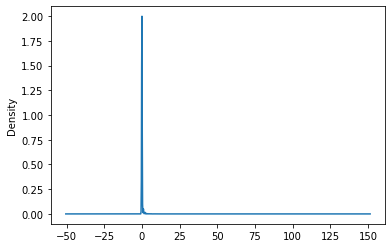

In [357]:
ax = df['Hate_Sonar'].plot.kde()

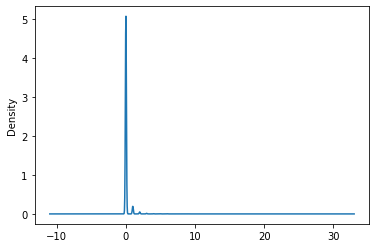

In [358]:
ax = df['Hate_Delimit'].plot.kde()

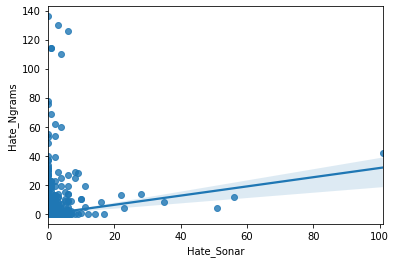

In [359]:
datas= df[['Hate_Sonar', 'Hate_Ngrams']]
ax = sns.regplot(x="Hate_Sonar", y="Hate_Ngrams", data=datas, robust=True,n_boot=10)

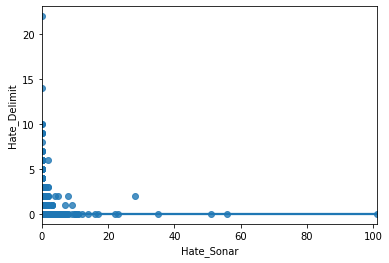

In [360]:
datas= df[['Hate_Sonar', 'Hate_Delimit']]
ax = sns.regplot(x="Hate_Sonar", y="Hate_Delimit", data=datas, robust=True,n_boot=10)

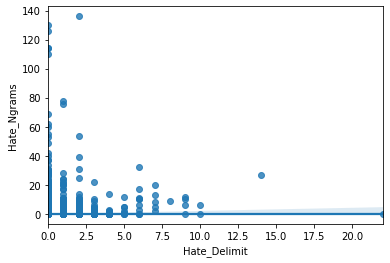

In [361]:
datas= df[['Hate_Delimit', 'Hate_Ngrams']]
ax = sns.regplot(x="Hate_Delimit", y="Hate_Ngrams", data=datas, robust=True, n_boot=10)

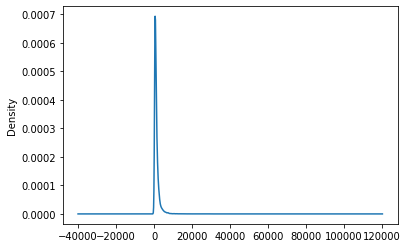

In [363]:
ax = df['Perplexity'].plot.kde()